# Effect of Crude Oil Price in Indian Budget

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import warnings
warnings.filterwarnings("ignore")

In [3]:
def getdata(url):
    r = requests.get(url)
    return r.text

htmldata = getdata("https://www.macrotrends.net/1369/crude-oil-price-history-chart")
soup = BeautifulSoup(htmldata, 'html.parser')

mydatastr = ''
result = []

for table in soup.find_all('tr'):
    mydatastr += table.get_text()

mydatastr = mydatastr[126:]
itemlist = mydatastr.replace('$','').replace('%','').split('\n\n')

for item in itemlist:
    result.append(item.split('\n'))
result    

[['2021', '62.94', '47.62', '75.23', '47.62', '74.10', '52.72'],
 ['2020', '39.68', '61.17', '63.27', '11.26', '48.52', '-20.64'],
 ['2019', '56.99', '46.31', '66.24', '46.31', '61.14', '35.42'],
 ['2018', '65.23', '60.37', '77.41', '44.48', '45.15', '-25.32'],
 ['2017', '50.80', '52.36', '60.46', '42.48', '60.46', '12.48'],
 ['2016', '43.29', '36.81', '54.01', '26.19', '53.75', '44.76'],
 ['2015', '48.66', '52.72', '61.36', '34.55', '37.13', '-30.53'],
 ['2014', '93.17', '95.14', '107.95', '53.45', '53.45', '-45.55'],
 ['2013', '97.98', '93.14', '110.62', '86.65', '98.17', '6.90'],
 ['2012', '94.05', '102.96', '109.39', '77.72', '91.83', '-7.08'],
 ['2011', '94.88', '91.59', '113.39', '75.40', '98.83', '8.15'],
 ['2010', '79.48', '81.52', '91.48', '64.78', '91.38', '15.10'],
 ['2009', '61.95', '46.17', '81.03', '34.03', '79.39', '78.00'],
 ['2008', '99.67', '99.64', '145.31', '30.28', '44.60', '-53.52'],
 ['2007', '72.34', '60.77', '99.16', '50.51', '95.95', '57.68'],
 ['2006', '66.05

In [4]:

df = pd.DataFrame(result, columns=['Year','Average_Price','Year_Open','Year_High','Year_Low','Year_Close','Annual_perChange'])
df = df.head(20)


# Last 20 year Barrel Price in USD

In [5]:
df

,Year,Average_Price,Year_Open,Year_High,Year_Low,Year_Close,Annual_perChange
0,2021,62.94,47.62,75.23,47.62,74.10,52.72
1,2020,39.68,61.17,63.27,11.26,48.52,-20.64
2,2019,56.99,46.31,66.24,46.31,61.14,35.42
3,2018,65.23,60.37,77.41,44.48,45.15,-25.32
4,2017,50.80,52.36,60.46,42.48,60.46,12.48
5,2016,43.29,36.81,54.01,26.19,53.75,44.76
6,2015,48.66,52.72,61.36,34.55,37.13,-30.53
7,2014,93.17,95.14,107.95,53.45,53.45,-45.55
8,2013,97.98,93.14,110.62,86.65,98.17,6.90
9,2012,94.05,102.96,109.39,77.72,91.83,-7.08


In [6]:
#Crude Oil Price - Per Barrel Price is in US Doller

# Information of the File

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              20 non-null     object
 1   Average_Price     20 non-null     object
 2   Year_Open         20 non-null     object
 3   Year_High         20 non-null     object
 4   Year_Low          20 non-null     object
 5   Year_Close        20 non-null     object
 6   Annual_perChange  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


Maximum and minimum price in $ in last 20 year

In [8]:
df['Average_Price'].max()

'99.67'

In [9]:
df['Average_Price'].min()

'26.19'

# Graphial representation of Avg Crude oil price and Year

In [10]:
convert_dict = {'Year': int, 'Average_Price' : float, 'Year_Open': float, 'Year_High': float, 'Year_Low': float,
                'Year_Close': float, 'Annual_perChange': float}
df = df.astype(convert_dict)

year = df.Year.tolist()
avgp = df.Average_Price.tolist()

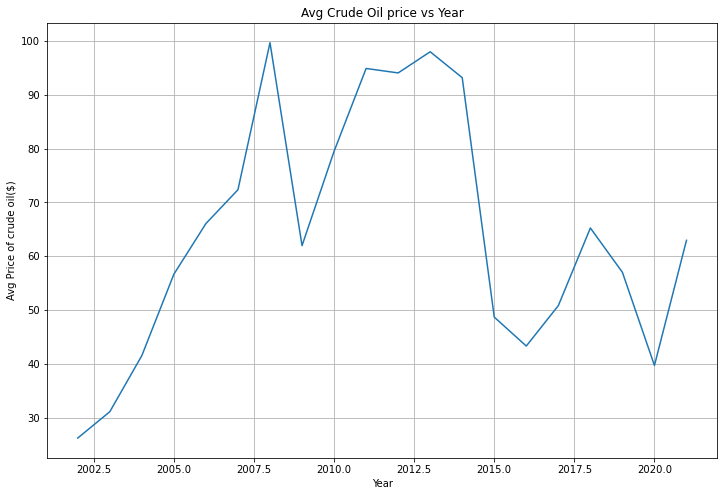

In [11]:
plt.figure(figsize=(12,8))
plt.plot(year,avgp)
plt.xlabel("Year")
plt.ylabel("Avg Price of crude oil($)")
plt.title('Avg Crude Oil price vs Year')
plt.grid(True)
plt.show()

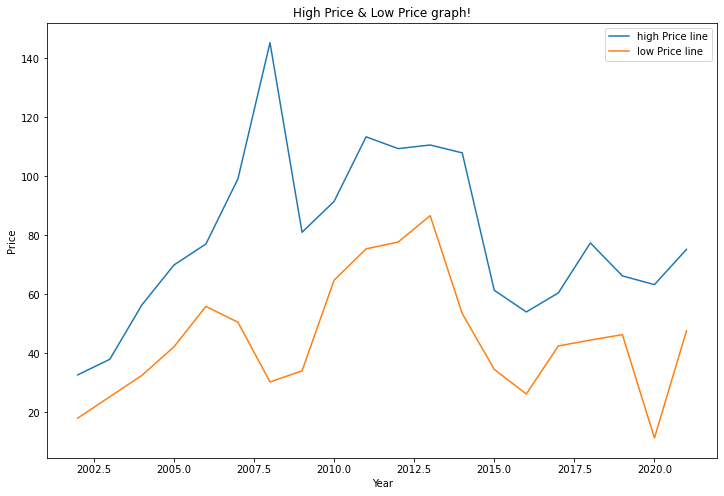

In [12]:
plt.figure(figsize=(12,8))

yhigh = df.Year_High.tolist()
ylow = df.Year_Low.tolist()

plt.plot(year, yhigh, label = 'high Price line')
plt.plot(year, ylow, label = 'low Price line')

plt.xlabel('Year')
plt.ylabel('Price')

plt.title('High Price & Low Price graph!')

plt.legend()

plt.show()

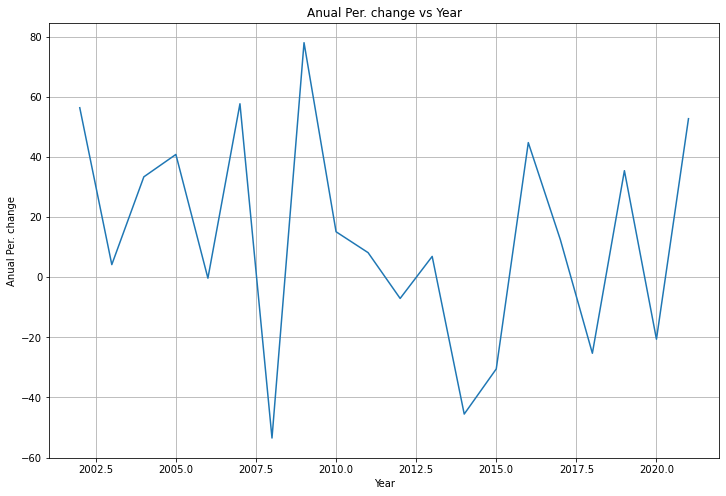

In [13]:
annualper = df.Annual_perChange.tolist()  
plt.figure(figsize=(12,8))
plt.plot(year,annualper)
plt.xlabel("Year")
plt.ylabel("Anual Per. change")
plt.title('Anual Per. change vs Year')
plt.grid(True)
plt.show()

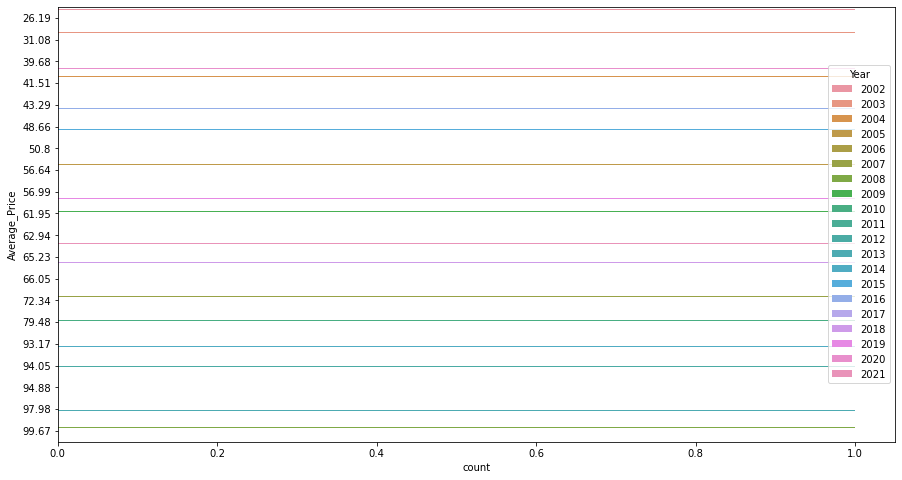

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(data=df, hue ='Year',  y ='Average_Price')

plt.show()

<AxesSubplot:xlabel='Average_Price', ylabel='Year'>

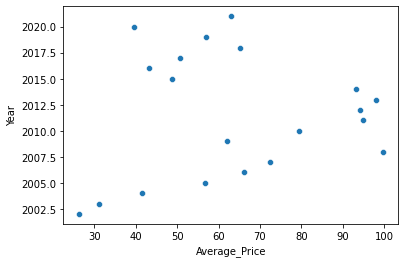

In [15]:
sns.scatterplot(data=df, y='Year', x='Average_Price')

# Suggestion for oil/fuel tax reduction
# If goverment collect oil/fuel from non-Promotional items like: Tobacco, Alcohol

If goverment collects some taxes from non-promotional items like:Tabaco, Alcohol
So it will get tax value reduction i.e. 75 % of tax value
Present tax is 250%
After reduction of  75 % from tax 
Now new tax value is 175 %  of  tax value
and also it will good for savings as well as reduction in every aspects.

Crude oil Price in India

Convert USD Price in INR 

In [16]:
df['IndAg'] = df['Average_Price']  # Indian Petrol Avg Barrel Price 
df['Indpl'] = df['Average_Price']  # Indian Petrol Price
df['cnt_Tax'] = df['Average_Price']
df['cnt_market_price'] = df['Average_Price']
df['sugg_Tax'] = df['Average_Price']
df['sugg_market_Price'] = df['Average_Price']
df['Tot_saving'] = df['Average_Price']
df['Sav_Per'] = df['Average_Price']

convert_dict = {'Average_Price' : float, 'IndAg': float, 'Indpl': float,'cnt_Tax': float, 
                'cnt_market_price': float, 'sugg_Tax': float, 'sugg_market_Price': float,
                'Tot_saving': float,'Sav_Per': float}
df = df.astype(convert_dict)


df['IndAg'] = df['IndAg'] * 74                         # converting USD in INR
df['Indpl'] = df['IndAg'] / 159                        # converting Barrel in litter price
df['cnt_Tax'] = df['Indpl'] * 2.5                      # Current Tax on Oil/Fules
df['cnt_market_price'] = df['Indpl'] + df['cnt_Tax']   # Due to Current Tax Current Oil/Fuel Price
df['sugg_Tax'] = df['Indpl'] * 1.75                    # Suggested Tax on Oil/Fules
df['sugg_market_Price'] = df['sugg_Tax'] + df['Indpl'] # Due to Suggestion Oil/Fules Price
df['Tot_saving'] = df['cnt_market_price'] - df['sugg_market_Price'] # Due to suggestion Saving Tax Price
df['Sav_Per'] = ((df['cnt_market_price'] - df['sugg_market_Price']) / df['cnt_market_price']) * 100

df.drop(['Year_Open','Year_High','Year_Low','Year_Close','Annual_perChange'], axis=1, inplace = False)


,Year,Average_Price,IndAg,Indpl,cnt_Tax,cnt_market_price,sugg_Tax,sugg_market_Price,Tot_saving,Sav_Per
0,2021,62.94,4657.56,29.292830,73.232075,102.524906,51.262453,80.555283,21.969623,21.428571
1,2020,39.68,2936.32,18.467421,46.168553,64.635975,32.317987,50.785409,13.850566,21.428571
2,2019,56.99,4217.26,26.523648,66.309119,92.832767,46.416384,72.940031,19.892736,21.428571
3,2018,65.23,4827.02,30.358616,75.896541,106.255157,53.127579,83.486195,22.768962,21.428571
4,2017,50.80,3759.20,23.642767,59.106918,82.749686,41.374843,65.017610,17.732075,21.428571
5,2016,43.29,3203.46,20.147547,50.368868,70.516415,35.258208,55.405755,15.110660,21.428571
6,2015,48.66,3600.84,22.646792,56.616981,79.263774,39.631887,62.278679,16.985094,21.428571
7,2014,93.17,6894.58,43.362138,108.405346,151.767484,75.883742,119.245881,32.521604,21.428571
8,2013,97.98,7250.52,45.600755,114.001887,159.602642,79.801321,125.402075,34.200566,21.428571
9,2012,94.05,6959.70,43.771698,109.429245,153.200943,76.600472,120.372170,32.828774,21.428571


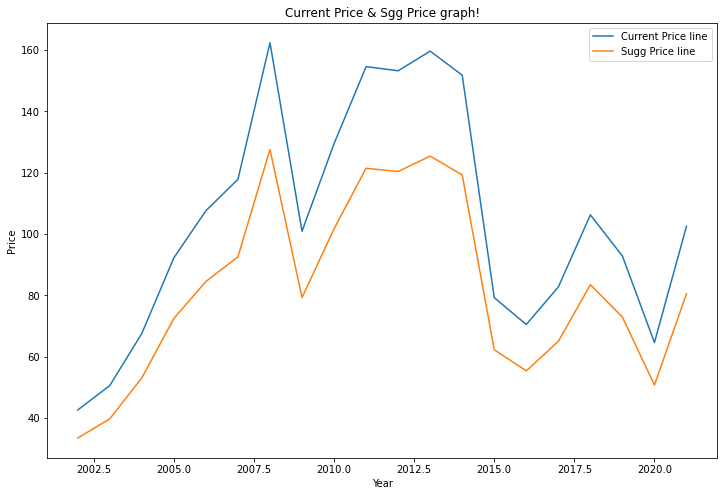

In [17]:
plt.figure(figsize=(12,8))

cntp = df.cnt_market_price.tolist()
sggp = df.sugg_market_Price.tolist()

plt.plot(year, cntp, label = 'Current Price line')
plt.plot(year, sggp, label = 'Sugg Price line')

plt.xlabel('Year')
plt.ylabel('Price')

plt.title('Current Price & Sgg Price graph!')

plt.legend()

plt.show()

# For 2021 Fuel Price and Suggested Tax


In [54]:
df.loc[0:0, 'Year':].drop(['Year_Open','Year_High','Year_Low','Year_Close','Annual_perChange'], axis=1, inplace = False)

,Year,Average_Price,IndAg,Indpl,cnt_Tax,cnt_market_price,sugg_Tax,sugg_market_Price,Tot_saving,Sav_Per
0,2021,62.94,4657.56,29.29283,73.232075,102.524906,51.262453,80.555283,21.969623,21.428571


In [55]:
# This above price as per 2021 Tax(Central Excise Tax + State VAT Tax + Proccessing )

# Budget of Normal Person in India

In [56]:
# If this is a Budget of a normal man in india

In [57]:
bgt = pd.read_excel("Budget.xlsx")
bgt
# ExAmount is in % current 

,Labels,ExAmount
0,Food,20
1,House/Rent,25
2,Savings,15
3,Clothes,5
4,Fuel,25
5,Miss.,10


In [58]:
labels= bgt.Labels.tolist()
amount = bgt.ExAmount.tolist()

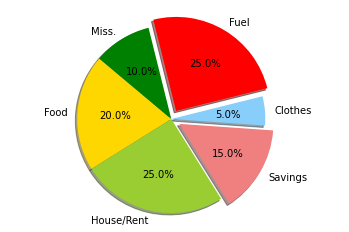

In [59]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','green']
explode = (0, 0, 0.1, 0, 0.1, 0)  

plt.pie(amount, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Result - After Saving Oil/Fuel Tax, Budget is

In [60]:
amount

[20, 25, 15, 5, 25, 10]

In [61]:
df.loc[0:0, 'Sav_Per']

0    21.428571
Name: Sav_Per, dtype: float64

In [62]:
namount = [19,23,24,4.5,20,9.5]

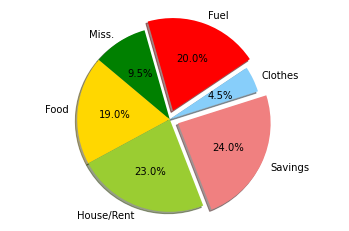

In [63]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','green']
explode = (0, 0, 0.1, 0, 0.1, 0)  

plt.pie(namount, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Conclusion : From above suggestion we can give suggestion to goverment to reduce taxes scale in oil fuels as per reduce as apply minimum tax on oil/fuel and do respective tax recovery from non-promotional items(like- Tobacco, Alcohol items)